# **Entrega - Grupo 8**

Realizado por:
- Lady Tatiana Garcia Moreno
- Joaquin Abondano Araoz
- Edwin Ricardo Ramirez Calvijo
- Omar Leonardo Albarracin Monsalve

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model      import LinearRegression, LogisticRegression
from sklearn.metrics           import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

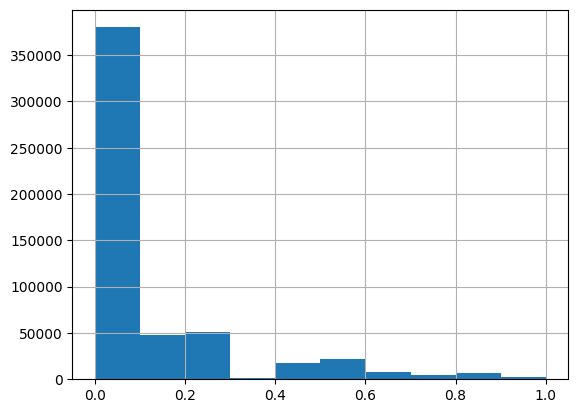

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
print(y.describe())

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64


In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Criterio de calificación: Se ajustan los datos de entrenamiento con la función CountVectorizer. Además, se transforman los datos de test, se entrena un modelo de regresión y se presenta el desempeño del modelo con la métrica del MSE. [5 puntos]

In [ ]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
# Visualización de diccionario de palabras con su respectivo ID asignado
vect.vocabulary_

{'oral': 91127,
 'history': 60749,
 'is': 67439,
 'what': 136457,
 'ever': 46583,
 'they': 125107,
 'say': 110750,
 'it': 67682,
 'nazis': 86202,
 'in': 64454,
 'the': 124581,
 '1930': 1649,
 'did': 38596,
 'eugenic': 46371,
 'experiments': 47347,
 'on': 90518,
 'native': 86035,
 'children': 27384,
 'at': 14725,
 'mcgill': 80014,
 'with': 137734,
 'full': 52599,
 'knowledge': 71877,
 'of': 89814,
 'government': 55832,
 'yup': 139920,
 'if': 63495,
 'happened': 58373,
 'who': 136894,
 'are': 13363,
 'we': 135729,
 'to': 126248,
 'didn': 38619,
 'marijuana': 78894,
 'less': 74583,
 'harmful': 58542,
 'human': 62386,
 'health': 59284,
 'than': 124498,
 'cigarettes': 28085,
 'which': 136645,
 'widely': 137099,
 'used': 132446,
 'and': 11703,
 'there': 124961,
 'no': 87715,
 'ban': 16514,
 'reduces': 104654,
 'stress': 120277,
 'aggression': 9490,
 'level': 74674,
 'leading': 73899,
 'crime': 33788,
 'its': 67777,
 'medical': 80457,
 'value': 132943,
 'favorable': 48684,
 'effects': 43479,


In [ ]:
# Impresión de dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_train_dtm.shape

(362779, 141176)

In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vect.get_feature_names_out()[-150:-100])

['𝗕𝗲' '𝗙𝗮𝘁𝗵𝗲𝗿' '𝗜𝗳' '𝗦𝗼' '𝗧𝗿𝘂𝗹𝘆' '𝗮𝗻𝗱' '𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲' '𝗮𝘀' '𝗯𝗲' '𝗯𝗶𝗹𝗹𝗶𝗼𝗻' '𝗯𝘆'
 '𝗰𝗮𝗿𝗲𝗳𝘂𝗹' '𝗱𝗼' '𝗱𝗼𝗹𝗹𝗮𝗿𝘀' '𝗳𝗿𝗼𝗺' '𝗳𝗿𝗼𝗻𝘁' '𝗳𝘂𝗹𝗹' '𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝗴𝗶𝘃𝗲'
 '𝗵𝗮𝘃𝗲' '𝗵𝗲𝗮𝘃𝗲𝗻' '𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝗵𝘁𝘁𝗽𝘀' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀' '𝗶𝗻' '𝗶𝘁' '𝗻𝗲𝗲𝗱𝘆' '𝗻𝗼'
 '𝗻𝗼𝘁' '𝗼𝗳' '𝗼𝗻' '𝗼𝘁𝗵𝗲𝗿𝘀' '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀'
 '𝘀𝗲𝗲𝗻' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝘁𝗲𝗹𝗹' '𝘁𝗵𝗲' '𝘁𝗵𝗲𝗶𝗿' '𝘁𝗵𝗲𝗺' '𝘁𝗵𝗲𝘆' '𝘁𝗼'
 '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀' '𝘄𝗵𝗲𝗻' '𝘄𝗶𝗹𝗹' '𝘄𝗶𝘁𝗵' '𝘆𝗼𝘂']


In [ ]:
# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_dtm, y_train)

LinearRegression()

In [ ]:
# Predicción de probabilidades y cálculo del MSE
# Predecir sobre test
y_pred = model.predict(X_test_dtm)

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE en test: {mse:.4f}")

MSE en test: 0.0372


#### **Interpretacion de resultados**

**Metodología**
* En primer lugar, se vectorizaon de los comentarios con `CountVectorizer`, ajustando el vocabulario sobre el conjunto de entrenamiento mediante `fit_transform()` y aplicando la transformación al conjunto de prueba con `transform()`.
* Posteriormente, se realizó el entrenamiento de un regresor lineal utilizando las probabilidades reales de toxicidad (`y_train`) como variable objetivo.

**Resultados**
* Se obtuvo un MSE = 0.0372 en el conjunto de test
* Este valor indica un bajo error cuadrático medio, lo que refleja que las predicciones de probabilidad se ajustan a las probabilidades reales del nivel de toxicidad de los comentarios.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Criterio de calificación: Se ajustan los datos de entrenamiento con la función CountVectorizer usando trigramas. Además, se transforman los datos de test, se entrena un modelo de regresión y se presenta el desempeño del modelo con la métrica del MSE. [5 puntos]

In [ ]:
# Celda 2
# Creación de matrices usando CountVectorizer a partir de X y usando tri-gramas
vect_trigrama = CountVectorizer(lowercase=True, ngram_range=(3, 3))
X_train_dtm_trigrama = vect_trigrama.fit_transform(X_train)
X_test_dtm_trigrama = vect_trigrama.transform(X_test)

In [ ]:
# Visualización de diccionario de palabras con su respectivo ID asignado
vect_trigrama.vocabulary_

{'oral history is': 6352957,
 'history is what': 3966108,
 'is what ever': 4550711,
 'what ever they': 9993182,
 'ever they say': 2859733,
 'they say it': 8971339,
 'say it is': 7488580,
 'it is nazis': 4611057,
 'is nazis in': 4495130,
 'nazis in the': 5638448,
 'in the in': 4254245,
 'the in 1930': 8592275,
 'in 1930 did': 4168426,
 '1930 did eugenic': 36410,
 'did eugenic experiments': 2415219,
 'eugenic experiments on': 2828572,
 'experiments on native': 2927351,
 'on native children': 6185561,
 'native children at': 5629621,
 'children at mcgill': 1812337,
 'at mcgill with': 1021614,
 'mcgill with the': 5295277,
 'with the full': 10240084,
 'the full knowledge': 8563348,
 'full knowledge of': 3344544,
 'knowledge of the': 4821299,
 'of the government': 6067505,
 'the government yup': 8572763,
 'government yup if': 3543066,
 'yup if they': 10539433,
 'if they say': 4117017,
 'say it happened': 7488561,
 'it happened who': 4603921,
 'happened who are': 3657547,
 'who are we': 100869

In [ ]:
# Impresión de dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_train_dtm_trigrama.shape

(362779, 10546378)

In [ ]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_trigrama.get_feature_names_out()[-150:-100])

['𝗵𝗼𝗻𝗼𝗿𝗲𝗱 𝗯𝘆 𝗼𝘁𝗵𝗲𝗿𝘀' '𝗵𝘁𝘁𝗽𝘀 𝘆𝗼𝘂𝘁𝘂 𝗯𝗲' '𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀 𝗱𝗼 𝗶𝗻' '𝗶𝗻 𝗳𝗿𝗼𝗻𝘁 𝗼𝗳'
 '𝗶𝗻 𝗳𝘂𝗹𝗹 matthew' '𝗶𝗻 𝗵𝗲𝗮𝘃𝗲𝗻 𝗦𝗼' '𝗶𝗻 𝘁𝗵𝗲 𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀' '𝗶𝘁 𝘄𝗶𝘁𝗵 𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀'
 '𝗻𝗲𝗲𝗱𝘆 𝗱𝗼 𝗻𝗼𝘁' '𝗻𝗼 𝗿𝗲𝘄𝗮𝗿𝗱 𝗳𝗿𝗼𝗺' '𝗻𝗼𝘁 𝗮𝗻𝗻𝗼𝘂𝗻𝗰𝗲 𝗶𝘁' '𝗻𝗼𝘁 𝘁𝗼 𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲'
 '𝗼𝗳 𝗼𝘁𝗵𝗲𝗿𝘀 𝘁𝗼' '𝗼𝗻 𝘁𝗵𝗲 𝘀𝘁𝗿𝗲𝗲𝘁𝘀' '𝗼𝘁𝗵𝗲𝗿𝘀 𝗧𝗿𝘂𝗹𝘆 𝘁𝗲𝗹𝗹' '𝗼𝘁𝗵𝗲𝗿𝘀 𝘁𝗼 𝗯𝗲'
 '𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲 𝘆𝗼𝘂𝗿 𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀' '𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱 𝘁𝗵𝗲𝗶𝗿 𝗿𝗲𝘄𝗮𝗿𝗱' '𝗿𝗲𝘄𝗮𝗿𝗱 𝗳𝗿𝗼𝗺 𝘆𝗼𝘂𝗿'
 '𝗿𝗲𝘄𝗮𝗿𝗱 𝗶𝗻 𝗳𝘂𝗹𝗹' '𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀 𝗶𝗻 𝗳𝗿𝗼𝗻𝘁' '𝘀𝗲𝗲𝗻 𝗯𝘆 𝘁𝗵𝗲𝗺' '𝘀𝘁𝗿𝗲𝗲𝘁𝘀 𝘁𝗼 𝗯𝗲'
 '𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀 𝗮𝗻𝗱 𝗼𝗻' '𝘁𝗲𝗹𝗹 𝘆𝗼𝘂 𝘁𝗵𝗲𝘆' '𝘁𝗵𝗲 𝗵𝘆𝗽𝗼𝗰𝗿𝗶𝘁𝗲𝘀 𝗱𝗼' '𝘁𝗵𝗲 𝗻𝗲𝗲𝗱𝘆 𝗱𝗼'
 '𝘁𝗵𝗲 𝘀𝘁𝗿𝗲𝗲𝘁𝘀 𝘁𝗼' '𝘁𝗵𝗲 𝘀𝘆𝗻𝗮𝗴𝗼𝗴𝘂𝗲𝘀 𝗮𝗻𝗱' '𝘁𝗵𝗲𝗶𝗿 𝗿𝗲𝘄𝗮𝗿𝗱 𝗶𝗻' '𝘁𝗵𝗲𝗺 𝗜𝗳 𝘆𝗼𝘂'
 '𝘁𝗵𝗲𝘆 𝗵𝗮𝘃𝗲 𝗿𝗲𝗰𝗲𝗶𝘃𝗲𝗱' '𝘁𝗼 𝗯𝗲 𝗵𝗼𝗻𝗼𝗿𝗲𝗱' '𝘁𝗼 𝗯𝗲 𝘀𝗲𝗲𝗻' '𝘁𝗼 𝗽𝗿𝗮𝗰𝘁𝗶𝗰𝗲 𝘆𝗼𝘂𝗿'
 '𝘁𝗼 𝘁𝗵𝗲 𝗻𝗲𝗲𝗱𝘆' '𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀 𝗮𝘀 𝘁𝗵𝗲' '𝘄𝗵𝗲𝗻 𝘆𝗼𝘂 𝗴𝗶𝘃𝗲' '𝘄𝗶𝗹𝗹 𝗵𝗮𝘃𝗲 𝗻𝗼'
 '𝘄𝗶𝘁𝗵 𝘁𝗿𝘂𝗺𝗽𝗲𝘁𝘀 𝗮𝘀' '𝘆𝗼𝘂 𝗱𝗼 𝘆𝗼𝘂' '𝘆𝗼𝘂 𝗴𝗶𝘃𝗲 𝘁𝗼' '𝘆𝗼𝘂 𝘁𝗵𝗲𝘆 𝗵𝗮𝘃𝗲'
 '𝘆𝗼𝘂 𝘄𝗶𝗹𝗹 𝗵𝗮𝘃𝗲' '𝘆𝗼𝘂𝗿 𝗙𝗮𝘁𝗵𝗲𝗿 𝗶𝗻' '𝘆𝗼𝘂𝗿 𝗿𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀𝗻𝗲𝘀𝘀 𝗶𝗻'
 '𝘆𝗼𝘂𝘁𝘂 𝗯𝗲 𝗴𝗞𝗭𝗘𝗳𝗿𝗪𝟱𝗺𝟳𝗤' '𝘊𝘩𝘦𝘤𝘬 𝘶𝘴𝘦 𝘣𝘺' '𝘢𝘴 𝘴𝘰𝘮𝘦 𝘱𝘳𝘪𝘰𝘳' '𝘣𝘦 𝘰𝘶𝘵𝘥𝘢𝘵𝘦𝘥 𝘸𝘩𝘦𝘯']


In [ ]:
# Entrenar modelo de regresión lineal
model2 = LinearRegression()
model2.fit(X_train_dtm_trigrama, y_train)

LinearRegression()

In [ ]:
# Predecir sobre test
y_pred = model2.predict(X_test_dtm_trigrama)

# Calcular  MSE
mse2 = mean_squared_error(y_test, y_pred)
print(f"MSE en test: {mse2:.4f}")

MSE en test: 0.0398


#### **Interpretacion de resultados**

**Metodología**
* Se empleó `CountVectorizer(ngram_range=(3,3))` para extraer únicamente trigramas de los comentarios
* El vectorizador se ajustó con `fit_transform(X_train)` y se aplicó al conjunto de prueba con `transform(X_test)`
* Se entrenó el mismo regresor lineal usando las probabilidades reales de toxicidad (`y_train`) como variable objetivo

**Resultados**
* Sobre el conjunto de test, el modelo basado en trigramas obtuvo un MSE = 0.0398

**Conclusiones - Comparación frente al punto 1:**
* En comparación con el modelo inicial de unigrama del punto 1 (MSE = 0.0372), el uso de trigramas produjo un leve empeoramiento del desempeño
* Lo anterior puede deberse a que dado el uso de trigramas, aumenta la dimensionalidad. Por lo cual, el unigrama resultó más efectivo.


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

Criterio de calificación: Se presenta una descripción detallada de la función TfidfVectorizer y de su funcionamiento. Además, se identifican claramente las ventajas o desventajas de su uso al compararlo con la función CountVectorizer. [5 puntos]

---

#### **TfidfVectorizer (Term Frequency - Inverse Document Frequency)**



**Descripción:**
> TfidfVectorizer (Term Frequency - Inverse Document Frequency) es una
 clase de scikit-learn que funciona como extensión de CountVectorizer. Mientras que CountVectorizer solo cuenta las palabras, TfidfVectorizer también considera la importancia de las palabras en todos los documentos (Kumar, 2024).

> TfidfVectorizer es una herramienta que funciona convirtiendo textos en vectores numéricos usando la medida TF-IDF, que se encarga de cuantificar qué tan relevante es una palabra en un documento dado un corpus (colección de documentos). Por ende, esta medida aumenta con el número de veces que una palabra aparece en un documento, pero disminuye si la palabra es muy común, o se repite mucho en todo el conjunto de documentos.

> Esto permite dar mayor peso a términos importantes y dar menos peso a palabras muy frecuentes y que normalmente no son muy informativa, como son los artículos y las preposiciones.

> El resultado que brinda esta herramienta es un vector numérico ponderado, donde cada una de las posiciones corresponde a una palabra del vocabulario y su valor indica la relevancia de esa palabra en el documento.

**Funcionamiento:**
> 1.   Primero, se calcula la frecuencia de término (TF) en cada documento. Esto es equivalente al número de veces que aparece un token dividido por la longitud total del documento.
2.  Segundo, se aplica la frecuencia inversa de documento (IDF). Acá se penaliza los tokens muy comunes a lo largo del corpus y se realza los más distintivos.
3. Como resultado se obtiene una matriz con los valores TF-IDF


**¿Cuáles son las diferencias entre CountVectorizer y TfidfVectorizer?**

> Las dos herramientas comparten la misma idea: **convertir texto en vectores numéricos basados en la presencia de palabras**. Pero, se diferencian en la manera en que les dan una ponderación a palabras.

> CountVectorizer cuenta cuantas veces aparece una palabra en un documento, mientras que TfidfVectorizer cuenta y pondera según la relevancia de la palabra en un documento, dentro de un conjunto de documentos.

> **Importancia de los términos:**
- CountVectorizer: No diferencia importancia, es decir todas las palabras cuentan por igual, lo que significa que palabras muy comunes tendrán peso alto si aparecen con frecuencia en el documento.
- TfidfVectorizer: Sí pondera importancia. Las palabras comunes reciben menos peso si en el conjunto de documentos aparece muchas veces, mientras que las palabras menos frecuentes pueden tener más peso si en el conjunto de documentos aparece pocas veces.


> **Ventajas de TfidfVectorizer frente a CountVectorizer:**
- Relevancia semántica: genera vectores más informativos al considerar la distribución de las palabras en todo el corpus.
- Reducción del peso de palabras frecuentes: Los términos muy comunes (ej. artículos) reciben valores bajos, mejorando la capacidad del modelo para distinguir vocabulario relevante
- Mejor desempeño para distinguir entre documentos que tratan de temas diferentes, en tareas como clasificación por temas, al enfocarse en palabras clave que generan contexto.


> **Desventajas de TfidfVectorizer frente a CountVectorizer:**
- Mayor costo de computacion: El cálculo de IDF añade iteraciones adicionales sobre el corpus completo, lo que puede elevar el tiempo de entrenamiento y el uso de memoria en grandes volúmenes de texto
- Mal desempeño en textos cortos: con muy pocas palabras, las métricas TF e IDF pueden resultar erroneas.
- Subestimación de términos comúnmente importantes: se pueden omitir palabras frecuentes que podrían ser clave (ej., nombres propios), cuya frecuencia si sería relevante en CountVectorizer
- Si solo interesa la frecuencia bruta de las palabras, el CountVectorizer es una opción más simple y efectiva.



**Referencias**
> - Geeksforgeeks. (2024). How to store a TfidfVectorizer for future use in scikit-learn? Recuperado de: https://www.geeksforgeeks.org/how-to-store-a-tfidfvectorizer-for-future-use-in-scikit-learn/
- Kumar, A. (2024). CountVectorizer vs TfidfVectorizer. Recuperado de: https://dev.to/aashwinkumar/countvectorizer-vs-tfidfvectorizer-1kck
- Masudowolabi. (2024). How to Use sklearn’s TfidfVectorizer for Text Feature Extraction in Model Testing. Recuperado de: https://medium.com/@masudowolabi/how-to-use-sklearns-tfidfvectorizer-for-text-feature-extraction-in-model-testing-e1221fd274f8
- Scikit-learn. (s.f). TfidfVectorizer. Recuperado de: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

Criterio de calificación: Se ajustan los datos de entrenamiento con la función TfidfVectorizer. Además, se transforman los datos de test, se entrena un modelo de regresión y se presenta el desempeño del modelo con la métrica del MSE. [5 puntos]

In [ ]:
# Celda 4
# Creación de matrices de documentos usando TF-IDF a partir de X
vect_tfidf = TfidfVectorizer()
X_train_dtm_tfidf = vect.fit_transform(X_train)
X_test_dtm_tfidf = vect.transform(X_test)

In [ ]:
# Impresión de dimensiones de matriz de documentos donde las filas son documentos y las columnas son términos o tokens
X_train_dtm_tfidf.shape

(362779, 141176)

In [ ]:
# Entrenar modelo de regresión lineal
model4 = LinearRegression()
model4.fit(X_train_dtm_tfidf, y_train)

LinearRegression()

In [ ]:
# Predecir sobre test
y_pred_tfidf = model4.predict(X_test_dtm_tfidf)

# Calcular  MSE
mse_tidf = mean_squared_error(y_test, y_pred_tfidf)
print(f"MSE (TF-IDF)en test: {mse_tidf:.4f}")

MSE (TF-IDF)en test: 0.0372


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

Criterio de calificación: Se comparan los resultados del desempeño obtenido con los diferentes modelos implementados, y se explica cómo el preprocesamiento de texto afecta el desempeño de los modelos. [5 puntos]

In [ ]:
# Celda 5
# Resultados de los modelos
df_mse = pd.DataFrame({
    'Modelo': [
        'CountVectorizer (unigramas)',
        'CountVectorizer (trigramas)',
        'TfidfVectorizer'
    ],
    'MSE': [mse, mse2, mse_tidf]
})

df_mse

,Modelo,MSE
0,CountVectorizer (unigramas),0.037212
1,CountVectorizer (trigramas),0.039803
2,TfidfVectorizer,0.037212


#### **Conclusiones**

**Comparación del desempeño entre modelos**
> * El modelo basado en unigramas y el entrenado con TF-IDF obtuvieron ambos un MSE de 0.0372, mientras que al usar únicamente trigramas el error aumentó a 0.0398
* Esto sugiere que, en este corpus y con el mismo regresor, las representaciones de un solo término capturan más apropiadamente la probabilidad de toxicidad que los patrones de tres palabras consecutivas, que resultan en un espacio de características muy disperso y con muchos más tokens de baja frecuencia.


**Afectación del preprocesamiento de texto en el desempeño de los modelos**
> * Unigramas: con el preprocesamiento basado en unigramas, el modelo aprovecha un espacio de características compacto, lo que reduce el ruido  y mejora la generalización y eficiencia del entrenamiento
* Trigramas: con trigramas, el preprocesamiento multiplica la dimensionalidad y genera tokens de baja frecuencia, incrementando la esparcidad (vectores vacios), dificultando la generalización y elevando el MSE a 0.0398
* TF-IDF: usar TF-IDF hace que el preprocesamiento pondere cada término según su frecuencia en el corpus, atenuando palabras comunes sin necesidad de listas externas de stop-words y manteniendo un MSE bajo (0.0372) al mejorar la discriminación de contenido relevante

> Por ende, el preprocesamiento con unigramas y TF-IDF consigue un bajo MSE, combinando eficiencia y relevancia informativa, mientras que el uso exclusivo de trigramas incrementa la esparcidad y puede reducir ligeramente el desempeño.